Planar: True
[[3, 0, 1, 2], [3, 4]]


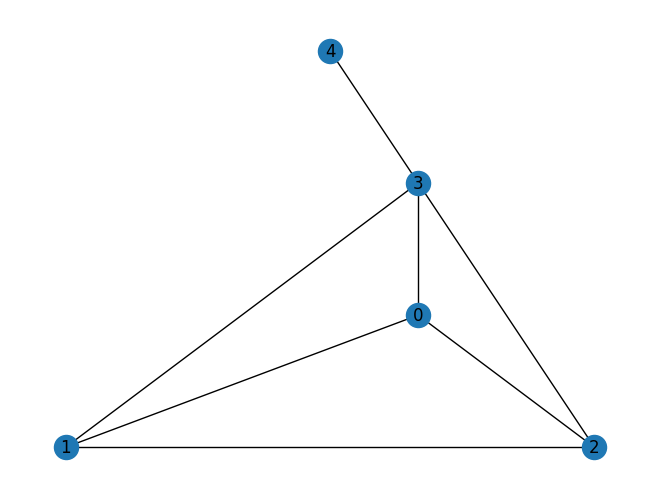

In [2]:
import networkx as nx

# Creem un graf
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (0, 3)])


nx.draw_planar(G, with_labels = True)

# Trobem les cliques del graf
cliques = list(nx.find_cliques(G))

print(f"Planar: {nx.is_planar(G)}")

print(cliques)

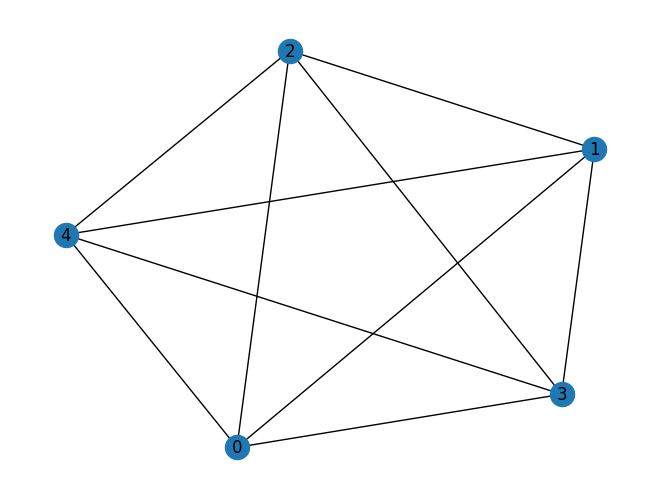

In [3]:
C = nx.complete_graph(5)
nx.draw(C, with_labels = True)

In [4]:
def build_graph(file):
   
    #La funció crea un graf no dirigit
   
    llista_edges = [] #Crea una llista per les arestes
    G = nx.Graph() #Genera un graf del tipus dirigit
    fitxer = open(file, "r") #Obre l'arxiu que conté els nodes amb les connexions
   
    for linia in fitxer: #Per cada línia del fitxer
        linia = linia[:-1] #Treure el \n
        string = linia.split(" ") #Separar la linia
        tupla = (string[0],string[1]) #Trasnformar en una tupla fer afegir-la com una aresta
        llista_edges.append(tupla) #Afegeix la aresta
   
    fitxer.close() #Tanca el fitxer
    G.add_edges_from(llista_edges) #Afegeix les arestes de la llista ja creada
   
    return G #Retorna el graf simple

In [5]:
import random

def simulate_mail(m,s):

    G = build_graph("C:/Users/david/OneDrive - UAB/Documentos/UAB/GiGD/Practica2/email-EU-core.txt")
    for aresta in G.edges:
        valor1 = aresta[0]
        valor2 = aresta[1]
       
        num = random.gauss(m,s)
       
        if num >= 0:
           
            G[valor1][valor2]["weight"] = round(num)
     
    return G

G = simulate_mail(1,1)

In [6]:
def clique_mida(G, mida):
    cliques = [clique for clique in nx.find_cliques(G) if len(clique) == mida]
    return cliques

G = build_graph("C:/Users/david/OneDrive - UAB/Documentos/UAB/GiGD/Practica2/email-EU-core.txt")

#nx.draw(G, with_labels=True)

print(clique_mida(G, 4))

[['678', '311', '184', '69'], ['678', '92', '400', '68'], ['678', '549', '184', '627'], ['547', '87', '333', '114'], ['48', '560', '66', '211'], ['48', '560', '84', '75'], ['48', '560', '84', '211'], ['48', '560', '40', '75'], ['48', '27', '165', '36'], ['48', '27', '37', '36'], ['48', '27', '37', '338'], ['48', '50', '654', '84'], ['48', '37', '96', '338'], ['48', '75', '372', '84'], ['48', '75', '76', '96'], ['48', '39', '370', '455'], ['48', '372', '115', '84'], ['967', '525', '44', '498'], ['967', '525', '44', '504'], ['967', '525', '44', '913'], ['26', '654', '24', '25'], ['26', '654', '24', '32'], ['26', '971', '113', '29'], ['26', '971', '113', '47'], ['26', '971', '251', '47'], ['26', '40', '442', '545'], ['229', '560', '39', '29'], ['229', '143', '31', '86'], ['229', '84', '513', '115'], ['229', '387', '366', '115'], ['229', '513', '170', '183'], ['229', '513', '170', '115'], ['229', '165', '198', '31'], ['229', '489', '434', '64'], ['714', '129', '615', '121'], ['593', '907',

In [13]:
def troba_k33(G: nx.Graph, num):
    retornar = []

    for node in G.nodes():
        #print(node)
        a = set(node)
        b = set()
        veins = G.neighbors(node)
        b.update(veins)
        for n in b:
            a.update(G.neighbors(n))
        if len(a.intersection(b)) >= 3:
            retornar.append(list(a.intersection(b)))

    if len(retornar) > 0:
        return retornar
    else:
        return None

print(troba_k33(G, 3))

def big_flat(G: nx.Graph):
    is_planar, P = nx.check_planarity(G)
    print(is_planar)

big_flat(G)

[['74', '146', '309', '65', '103', '222', '88', '218', '266', '380', '250', '498', '316', '268', '0', '177', '18', '101', '148', '226', '73', '1', '560', '581', '248', '166', '223', '215', '368', '6', '377', '297', '283', '734', '120', '238', '64', '313', '459', '17', '221', '178', '5'], ['82', '280', '74', '641', '199', '147', '146', '21', '127', '189', '155', '222', '495', '142', '255', '218', '250', '568', '316', '268', '0', '121', '310', '979', '284', '549', '450', '548', '317', '106', '254', '1', '560', '232', '128', '187', '215', '368', '85', '726', '377', '224', '537', '52', '84', '616', '459', '17', '221', '351', '225'], ['138', '58', '132', '271', '481', '886', '587', '434', '517', '612', '13', '405', '896', '651', '599', '899', '698', '102', '286', '308', '564', '2', '208', '4', '635', '516', '285', '845', '193', '1001', '408', '586', '880', '305', '971', '140', '54', '489', '990', '174', '281', '166', '333', '89', '859', '137', '63', '192', '3', '249', '64', '826', '409', '2